In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

class LogisticRegressor:
    def __init__(self):
        pass
    
    def predict(self, X) -> np.ndarray: 
        X = self.formatX(X)
        return  1/(1 + np.exp(- self.weights.T @ X.T))
    
    def fit(self, X, Y, degree=1, plot=False) -> None:
        """
        X: shape is (m, n)

        Y: shape is (m, 1)
        
        where 
            m is the number of data points
            n is the number of features   
        
        """
        X = self.formatX(X)
        m, n = X.shape
        weights = ((np.random.rand(n)-1) * 2).reshape(n, 1)
        step = .001
        numIteration = 50000
        history = []
        
        h = lambda x: 1/(1 + np.exp(- weights.T @ x))
#         cost = lambda: ( -Y * np.log(h(X.T)) - (1-Y) * np.log(1 - h(X.T)) ).mean()
        def cost():
            mean = 0
            for x, y in zip(X, Y):
                # x -> [x0, x1, x2, x3, ..] (1, n)
                # y -> 0 or 1
                if y == 1:
                    mean += -np.log(h(x))
                elif y == 0:
                    mean += -np.log(1 - h(x))
                else:
                    raise ValueError(f"Encountered a 'y' sample with value other than 0 or 1\ny:\t{y}")
            return (mean / m)[0]
        
        # Gradient Descent
        for _ in range(numIteration):
            for x, y in zip(X, Y):
                x = x.reshape(n, 1)
                weights = weights - step * 1/m * (h(x) - y) * x
            history.append(cost())
        
        print(f"Loss:\t{cost()}\nHistory:\t{history[::100]}\nWeights:\n{weights}")
        if plot:
            if n == 1 + 1:
                style.use('seaborn-pastel') #sets the size of the charts
                fig, ax = plt.subplots(2, figsize=(18, 16), dpi=80)
                ax[0].plot(history)
                ax[1].axhline(0.5, label=f"Threshold MSE: {cost()}", color='red')

                # Model (refactor later)
                temp = np.array(range(int(min(X[:, 1])), int(max(X[:, 1]))))
                indices = self.formatX(temp.reshape(temp.shape[0], 1)).reshape(temp.shape[0], n)
                ax[1].plot(indices[:, 1], h(indices.T).T, label="Logistic Regression Model", color='black')

                # Sample
                sample = X[:, 1].reshape(m, 1)
                ax[1].scatter(sample[Y == 1], Y[Y == 1], label="Class 1", color='green', marker='o')
                ax[1].scatter(sample[Y == 0], Y[Y == 0], label="Class 0", color='blue', marker='x')

                ax[1].legend()
                plt.show()
                
            elif n == 2 + 1:
                
#               # Refactor later
                ax = plt.axes(projection='3d')
                
                temp = np.array(range(int(np.min(X)), int(np.max(X))))
                indices  = self.formatX(temp.reshape(temp.shape[0], 1)).reshape(temp.shape[0], n-1)
                indices  = np.insert(indices, 2, temp, axis=1)
                ax.scatter3D(indices[:, 1], indices[:, 2], h(indices.T).T, label="Logistic Regression Model", color='black')
                
                sample = X[:, 1:].reshape(m, 2)
                ax.scatter3D(sample[:, 0][Y == 1], sample[:, 1][Y == 1], Y[Y == 1], label="Class 1", color='green', marker='o')
                ax.scatter3D(sample[:, 0][Y == 0], sample[:, 1][Y == 0], Y[Y == 0], label="Class 0", color='blue', marker='x')
                plt.show()
            else:
                print("Skipping plotting")
            
        self.degree = degree
        self.weights = weights
        return weights
    
    
    def formatX(self, X, degree=1):
        X = np.insert(X, 0, 1, axis=1) # Insert ones column (X₀)
        for i in range(degree-1):
            X = np.insert(X, X.shape[1], X[:, 1] ** (i+2), axis=1)
        return X

In [261]:
m = 100
n = 1
s = 2

X = np.array(list(range(1, (m * s) + 1, s))).reshape(m, n)
Y = (X > m * s / 2) + 0

In [3]:
lr = LogisticRegressor()

Loss:	0.28905564170316217
History:	[74.80154230086137, 0.8453395724844576, 0.8434829012580874, 0.8416341705816016, 0.8397933527877625, 0.8379604201358216, 0.8361353448142036, 0.8343180989431709, 0.8325086545774777, 0.830706983709013, 0.8289130582694247, 0.8271268501327331, 0.8253483311179292, 0.8235774729915561, 0.821814247470272, 0.8200586262233998, 0.8183105808754638, 0.8165700830086959, 0.8148371041655393, 0.8131116158511239, 0.8113935895357233, 0.8096829966571997, 0.8079798086234201, 0.8062839968146585, 0.8045955325859786, 0.8029143872695913, 0.8012405321771908, 0.7995739386022767, 0.7979145778224486, 0.7962624211016791, 0.794617439692565, 0.7929796048385586, 0.7913488877761717, 0.7897252597371626, 0.788108691950693, 0.7864991556454686, 0.7848966220518512, 0.7833010624039467, 0.7817124479416728, 0.7801307499128004, 0.7785559395749715, 0.7769879881976908, 0.7754268670642948, 0.7738725474738958, 0.7723250007433002, 0.7707841982089012, 0.7692501112285511, 0.7677227111834027, 0.7662019

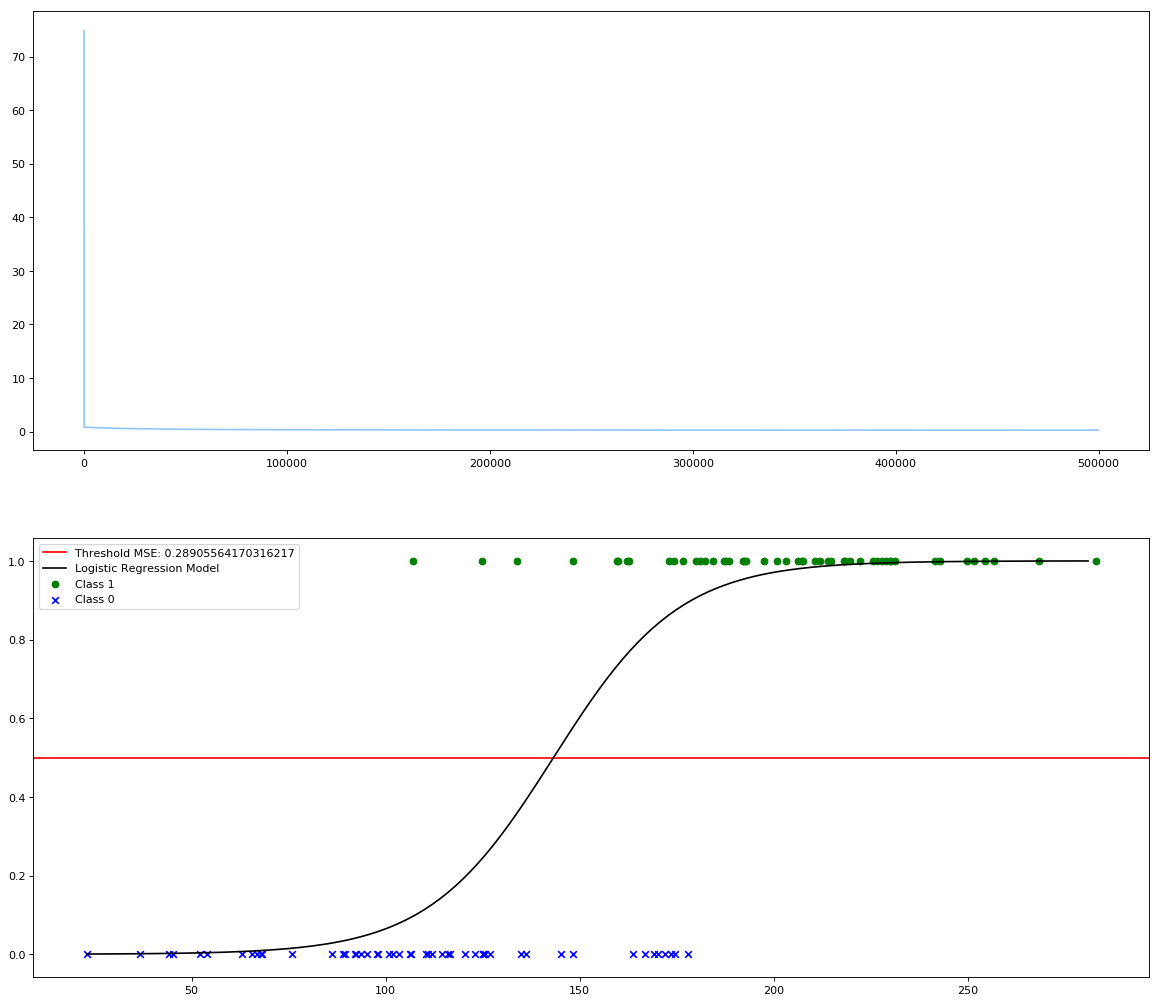

In [263]:
res = lr.fit(X + np.random.rand(m, n) * 100, Y, plot=True)

In [4]:
m = 100
n = 2
s = 2

temp = list(zip(range(1, (m * s) + 1, s), range((m * s) + 1, 1, -s)))
X = np.array(temp).reshape(m, n)
Y = (X[:, 1] > m * s / 2) + 0

In [5]:
lr = LogisticRegressor()

Loss:	0.028348221885159234
History:	[143.89773336510643, 0.05309115009548491, 0.039784375187987185, 0.03411752674852661, 0.03070194778188128]
Weights:
[[-1.06712284]
 [-0.13754908]
 [ 0.1495008 ]]
(200,)


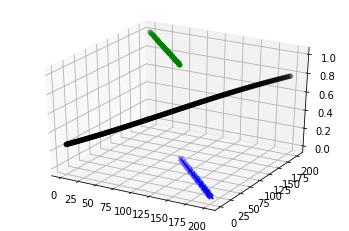

In [6]:
res = lr.fit(X + np.random.rand(m, n), Y, plot=True)